# Problem Statement
Use the dataset in assignment 4 (Abalone dataset).

a) Load the data from data file

b) Explore the shape of dataset

c) Summarize the properties in the training dataset. Write findings
from column description.

d) Check the dataset for any missing values, impute the missing
values and also print out the correlation matrix.

e) Split data into train, test sets

f) Predict ring class as classification problem using Naive Bayes
and Decision Tree Classifier

g) Calculate the accuracy score of the two models for both training
and test data set.

h) Display confusion matrix

i) Display the classification report

j) Compare the two models based on accuracy score and
classification report and give your reasoning on which is the best
model in this case.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [3]:
features = ['Sex','Length','Diameter','Height','Whole Weight','Shucked Weight','Viscera Weight','Shell Weight','Rings']
df = pd.read_csv('abalone.data',names = features)

In [4]:
df.head()

,Sex,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [5]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole Weight      float64
Shucked Weight    float64
Viscera Weight    float64
Shell Weight      float64
Rings               int64
dtype: object

In [6]:
gend = {'M':1.0,'F':2.0,'I':3.0}
df['Sex'] = [gend[item] for item in df['Sex']]
df

,Sex,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
0,1.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,1.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,3.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,2.0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,1.0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,1.0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,2.0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [7]:
df.dtypes

Sex               float64
Length            float64
Diameter          float64
Height            float64
Whole Weight      float64
Shucked Weight    float64
Viscera Weight    float64
Shell Weight      float64
Rings               int64
dtype: object

In [8]:
df.describe()

,Sex,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.955470,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.827815,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,1.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,1.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,2.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,3.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,3.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [9]:
df.corr()

,Sex,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
Sex,1.000000,-0.448765,-0.458245,-0.417928,-0.461238,-0.440927,-0.454658,-0.445549,-0.351822
Length,-0.448765,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,-0.458245,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,-0.417928,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole Weight,-0.461238,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked Weight,-0.440927,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera Weight,-0.454658,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell Weight,-0.445549,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,-0.351822,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


In [10]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole Weight      0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Rings             0
dtype: int64

In [11]:
y = df['Rings']
x = df.drop('Rings',axis= 1)

In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.35,random_state=1)

## Naive Baye's

In [13]:
gaussian = GaussianNB()
gaussian.fit(x_train,y_train)

GaussianNB()

In [14]:
predicted_test_prob = gaussian.predict(x_test)
predicted_train_prob = gaussian.predict(x_train)

In [15]:
from sklearn.metrics import accuracy_score
test_accuracy = gaussian.score(x_test,y_test)
print('accuracy_score on train dataset : ', gaussian.score(x_train,y_train))
print('accuracy_score on test dataset : ', test_accuracy)

accuracy_score on train dataset :  0.24235727440147328
accuracy_score on test dataset :  0.25444596443228457


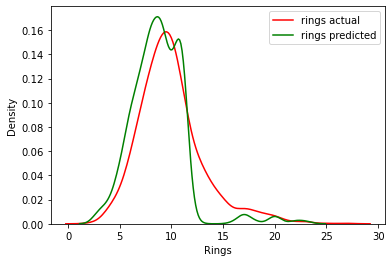

In [16]:
sns.kdeplot(y_test,label='rings actual',color = 'red')
sns.kdeplot(predicted_test_prob,label='rings predicted',color = 'green')
plt.legend()

## Decision Tree

In [17]:
dTree = DecisionTreeClassifier(criterion = 'entropy', random_state=42)
dTree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [18]:
print('Training data accuracy: ',dTree.score(x_train, y_train))
print('Test data accuracy: ',dTree.score(x_test, y_test))

Training data accuracy:  1.0
Test data accuracy:  0.18946648426812585


In [19]:
predY = dTree.predict(x_test)

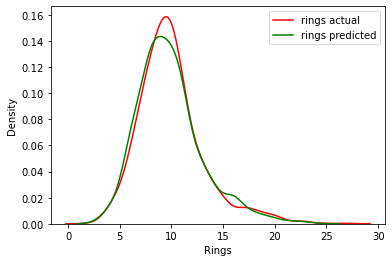

In [20]:
sns.kdeplot(y_test,label='rings actual',color = 'red')
sns.kdeplot(predY,label='rings predicted',color = 'green')
plt.legend()